
# Agrupamiento con K-Means usando el conjunto de datos Iris


Este notebook explica paso a paso cómo funciona el algoritmo K-Means con un conjunto de datos disponible en scikit-learn.


In [58]:
# 1. Importar bibliotecas necesarias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [59]:
# 2. Cargar el conjunto de datos Iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


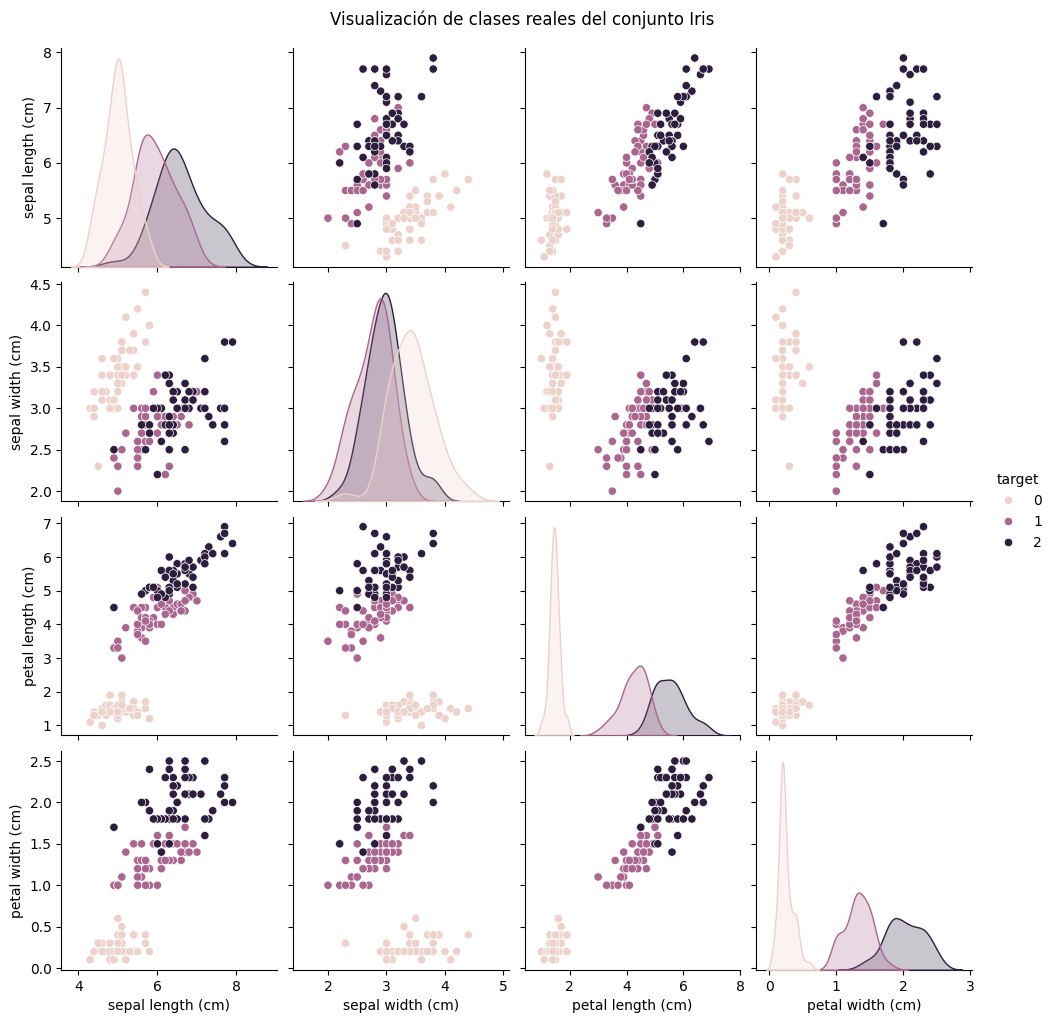

In [60]:
# 3. Visualizar los datos con las verdaderas etiquetas

sns.pairplot(df, hue='target', vars=data.feature_names)
plt.suptitle("Visualización de clases reales del conjunto Iris", y=1.02)
plt.show()


In [46]:
df.shape

(150, 5)

In [61]:
# 4. Aplicar el algoritmo K-Means

x = df[data.feature_names]  # Solo usamos las características
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
df['cluster_kmeans'] = kmeans.labels_  # Guardar los grupos asignados


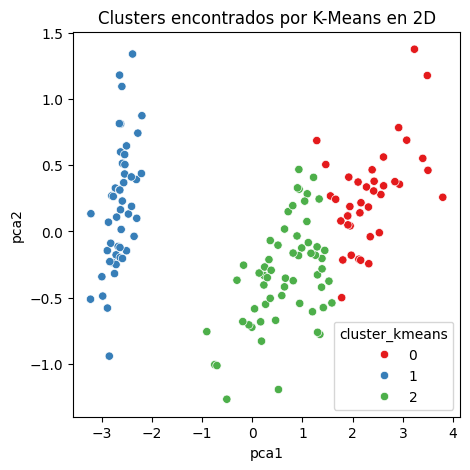

In [66]:
# 5. Visualizar los clusters asignados por K-Means con reducción de dimensiones (PCA)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
df['pca1'] = x_pca[:, 0]
df['pca2'] = x_pca[:, 1]
plt.figure(figsize=(5, 5))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_kmeans', data=df, palette='Set1')
plt.title("Clusters encontrados por K-Means en 2D")
plt.show()


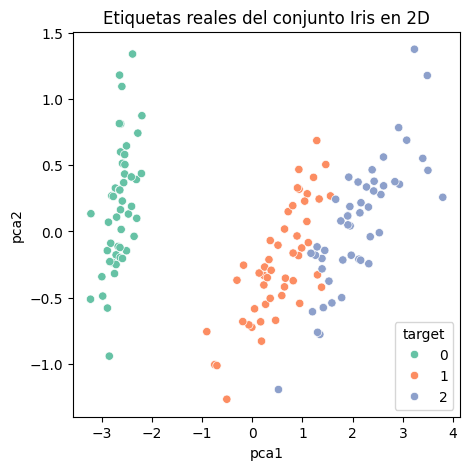

In [65]:
# 6. Comparar con las etiquetas reales
plt.figure(figsize=(5, 5))
sns.scatterplot(x='pca1', y='pca2', hue='target', data=df, palette='Set2')
plt.title("Etiquetas reales del conjunto Iris en 2D")
plt.show()

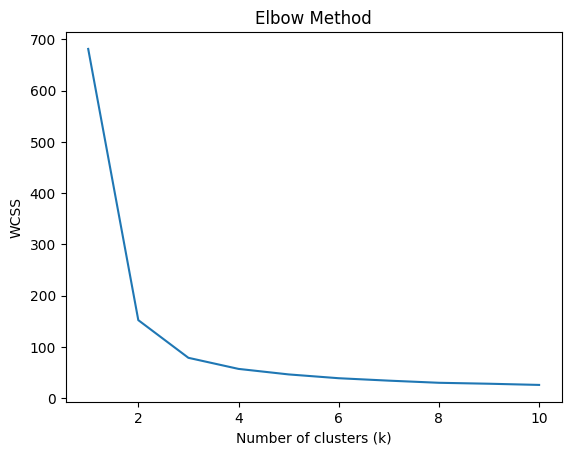

In [50]:

# Entrenamos varios modelos con k diferentes para identificar el mejor ajuste
# Creamos un arreglo para almacenar los resultados del Within-Cluster Sum of Squares (WCSS)
wcss = []
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # n_init for robustness
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [67]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score
)

# Etiquetas verdaderas
labels_true = df["target"]

# ---- Métricas internas ----
sil = silhouette_score(x, df['cluster_kmeans'])
db = davies_bouldin_score(x, df['cluster_kmeans'])
ch = calinski_harabasz_score(x, df['cluster_kmeans'])

print("Silhouette Score:", sil)
print("Davies-Bouldin Index:", db)
print("Calinski-Harabasz Index:", ch)

# ---- Métricas externas ----
ari = adjusted_rand_score(labels_true, df['cluster_kmeans'])
nmi = normalized_mutual_info_score(labels_true, df['cluster_kmeans'])

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)


Silhouette Score: 0.5511916046195919
Davies-Bouldin Index: 0.6660385791628479
Calinski-Harabasz Index: 561.5937320156642
Adjusted Rand Index (ARI): 0.7163421126838476
Normalized Mutual Information (NMI): 0.7419116631817836


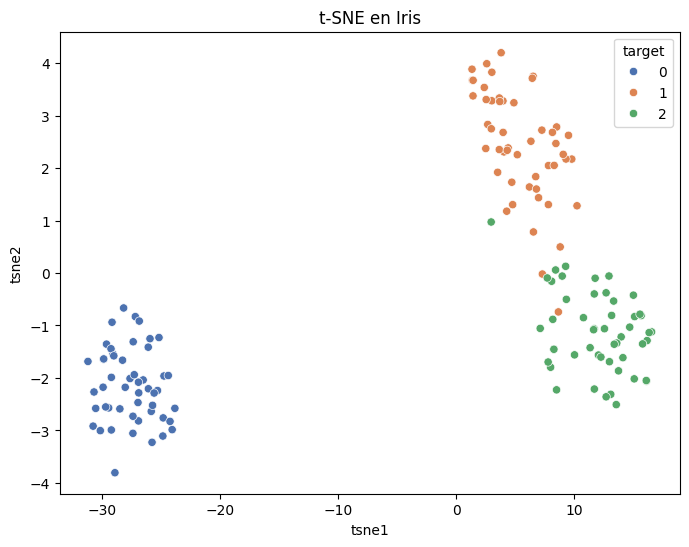

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import umap.umap_ as umap

# 2. Reducir con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(x)

# Agregar resultados al DataFrame
df["tsne1"] = X_tsne[:, 0]
df["tsne2"] = X_tsne[:, 1]

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(x="tsne1", y="tsne2", hue="target", palette="deep", data=df)
plt.title("t-SNE en Iris")
plt.show()



In [54]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)  # 3 clusters para Iris
gmm_ = gmm.fit_predict(x)  # puedes probar con X_tsne también

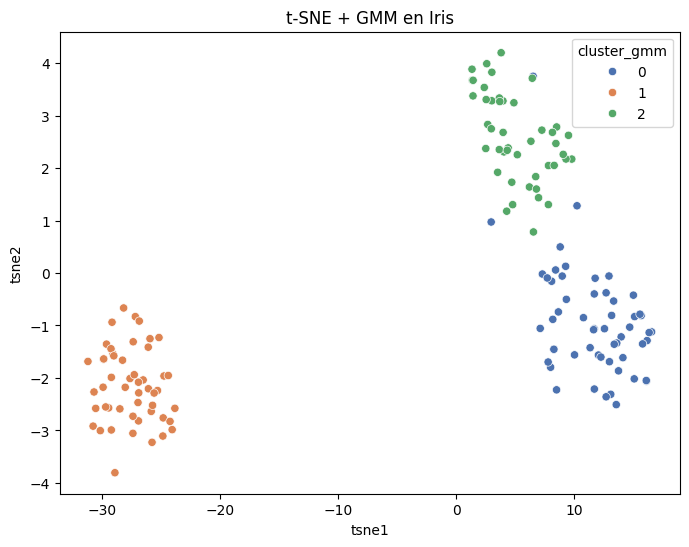

In [55]:
df["cluster_gmm"] = gmm_

# 5. Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster_gmm", palette="deep", data=df)
plt.title("t-SNE + GMM en Iris")
plt.show()

# sns.scatterplot(x='pca1', y='pca2', hue='cluster_gmm', data=df, palette='Set1')
# plt.title("Clusters encontrados por GMM en 2D")
# plt.show()

In [56]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'cluster_kmeans', 'pca1', 'pca2', 'tsne1',
       'tsne2', 'cluster_gmm'],
      dtype='object')

In [57]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Labels predichos por GMM
labels_pred = df["cluster_gmm"]

# Etiquetas verdaderas
labels_true = df["target"]

# ---- Métricas internas (no necesitan etiquetas verdaderas) ----
sil = silhouette_score(x, labels_pred)
db = davies_bouldin_score(x, labels_pred)
ch = calinski_harabasz_score(x, labels_pred)

print("Silhouette Score:", sil)
print("Davies-Bouldin Index:", db)
print("Calinski-Harabasz Index:", ch)

# ---- Métricas externas (comparando con las clases reales) ----
ari = adjusted_rand_score(labels_true, labels_pred)
nmi = normalized_mutual_info_score(labels_true, labels_pred)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)


Silhouette Score: 0.5011761635067206
Davies-Bouldin Index: 0.7483456326731006
Calinski-Harabasz Index: 481.78070899745234
Adjusted Rand Index (ARI): 0.9038742317748124
Normalized Mutual Information (NMI): 0.8996935451597475


In [ ]:

# 7. Conclusión
# - K-Means logró identificar patrones en los datos sin usar las etiquetas reales.
# - La visualización con PCA permitió observar qué tan bien se formaron los grupos.
# - El número de clusters debe elegirse con base en el problema; en este caso usamos 3 porque conocemos que hay tres especies.
